In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
#'https://drive.google.com/open?id=1Sj1tjnsqz22y7xdhbU1AN3nOqPJ7uhPC'

In [3]:
wine = pd.read_csv('winequality-white-Copy1.csv', sep = ';')

In [4]:
wine.columns 
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Check for null values

In [6]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

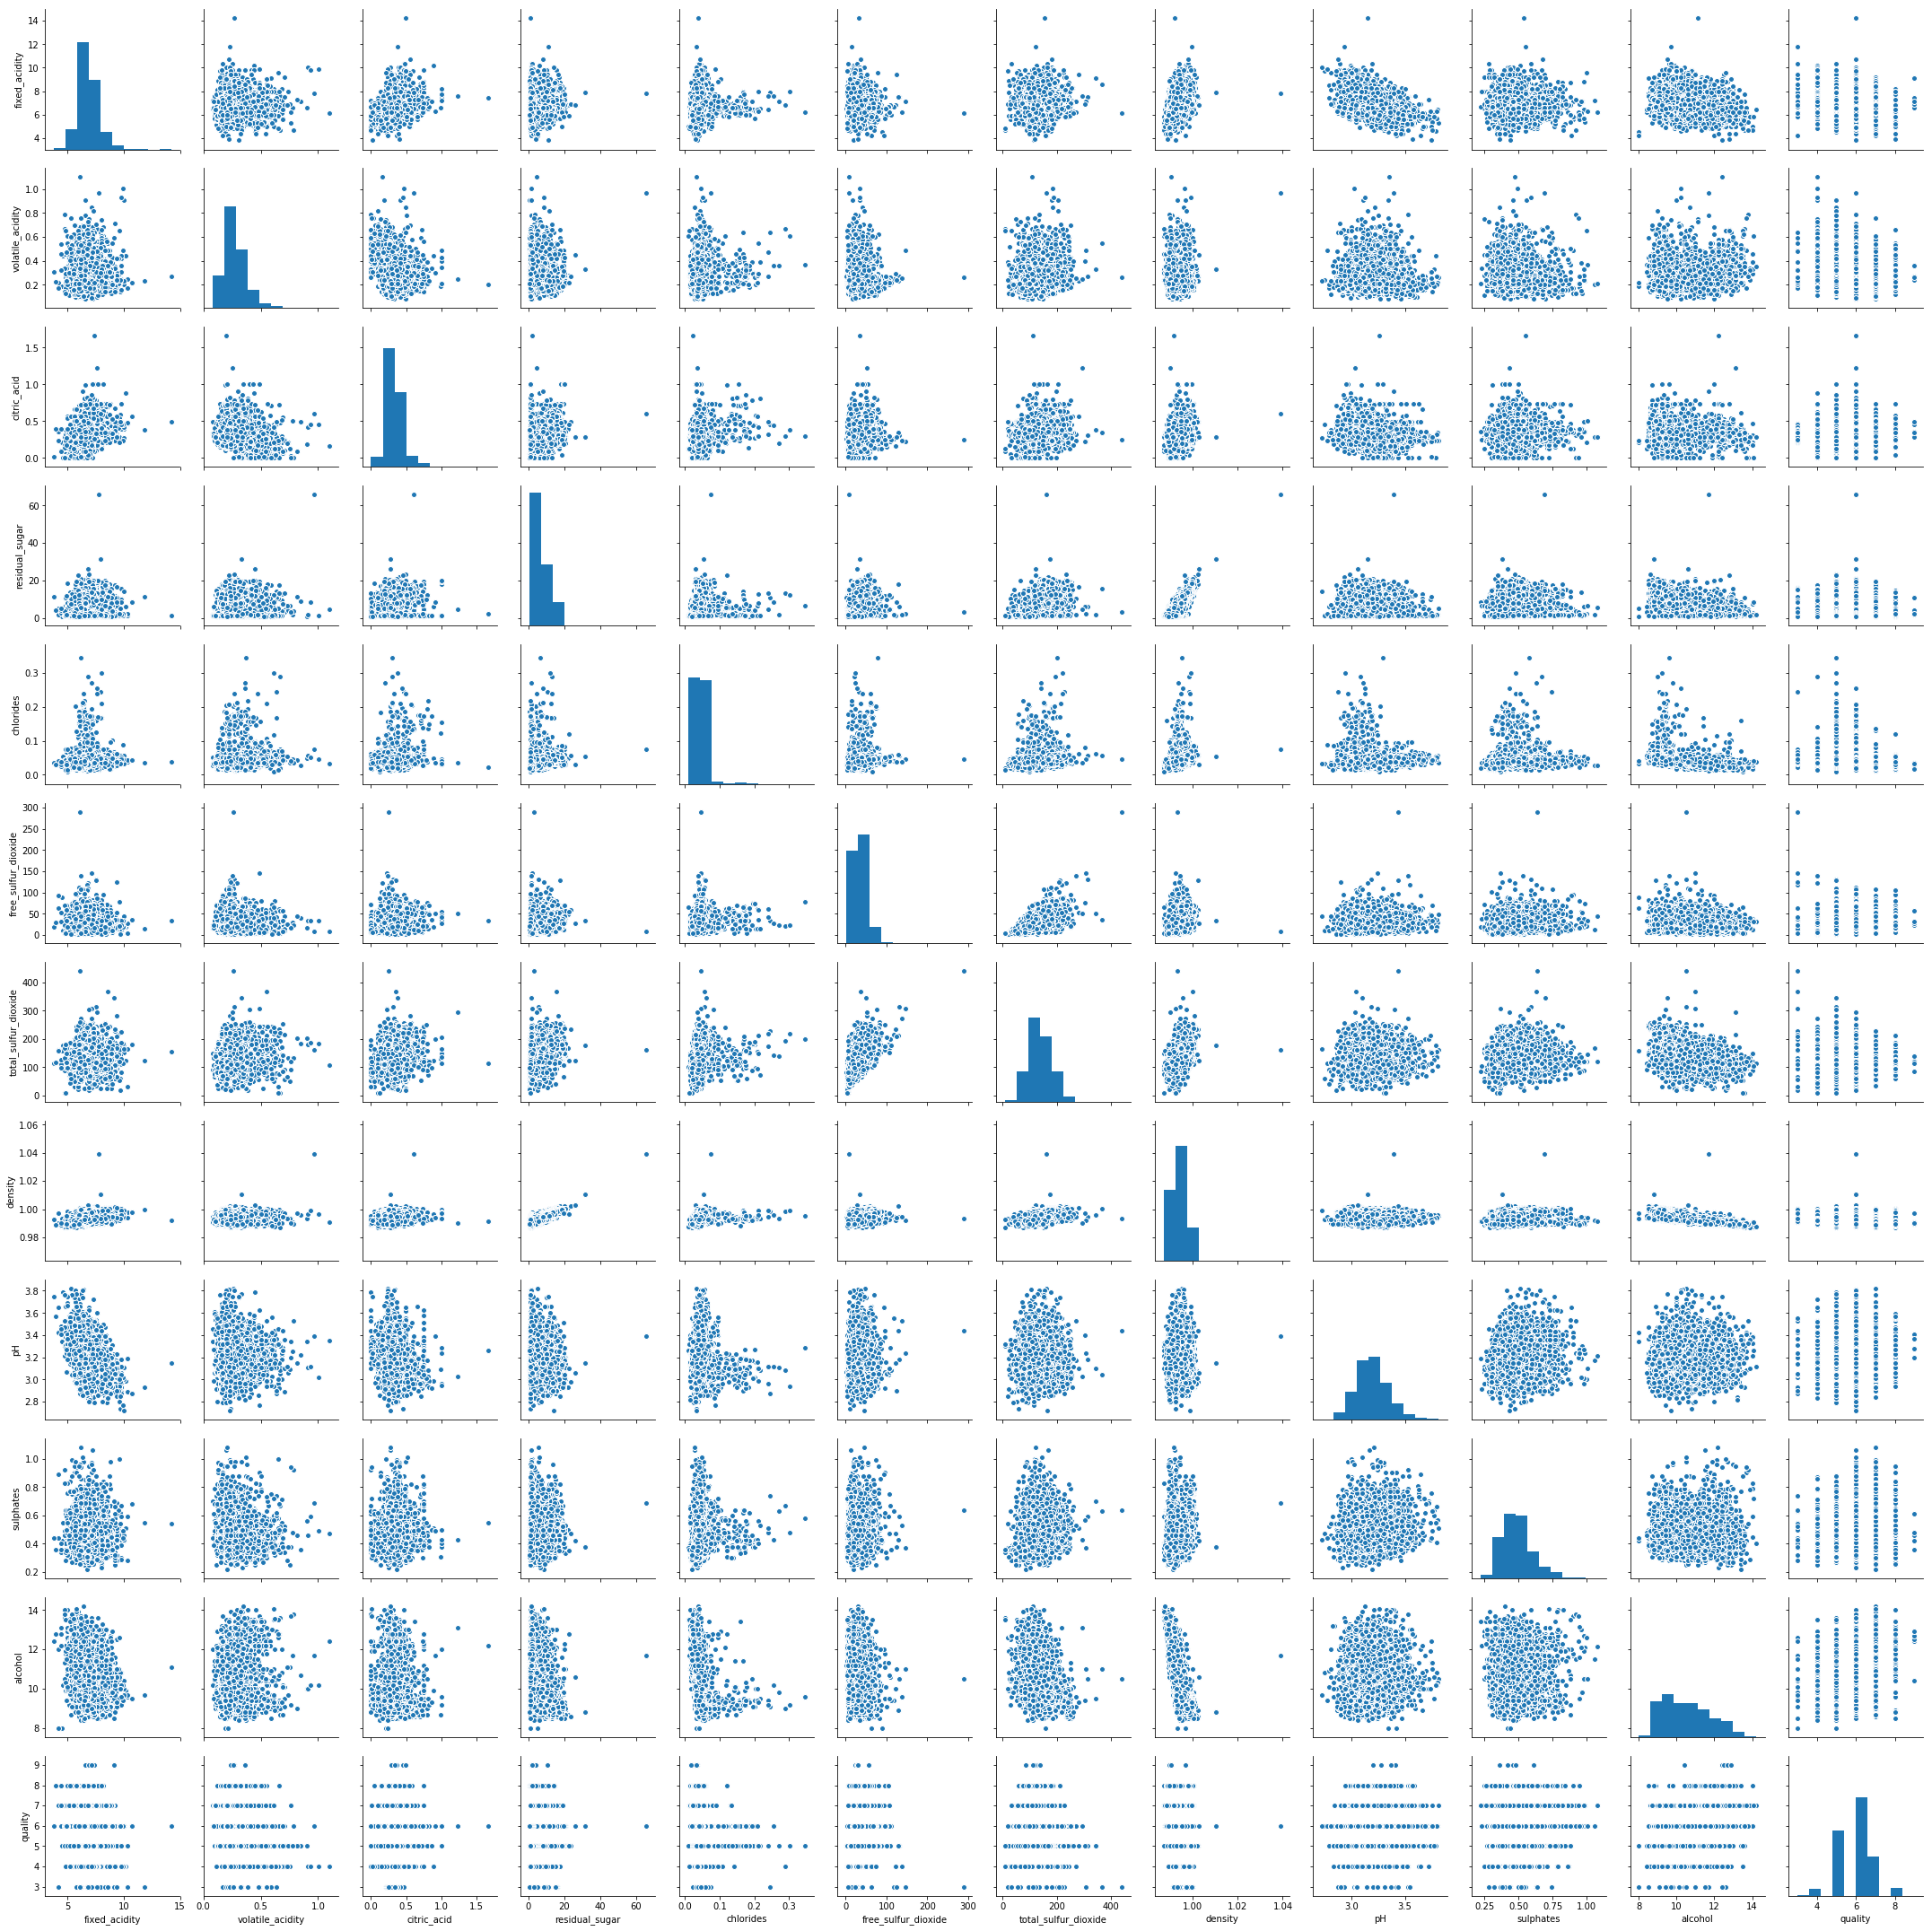

In [ ]:
sn.pairplot(wine)

In [ ]:
pd.plotting.scatter_matrix(wine, c=wine.quality, figsize=(30, 30));

# Visualization

In [ ]:
wine.describe()

In [ ]:
a = wine['residual_sugar'].describe()
print(a)
sn.boxplot('residual_sugar', data = wine, orient='v')

In [ ]:
a = wine['free_sulfur_dioxide'].describe()
print(a)
sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

In [ ]:
a = wine['total_sulfur_dioxide'].describe()
print(a)
sn.boxplot('total_sulfur_dioxide', data = wine, orient='v' )

# Model

In [ ]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
lin_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, lin_predict)

In [ ]:
model.score(X_test, y_test)

# Optimizing

In [ ]:
wine.describe()

In [ ]:
a = wine['residual_sugar'].describe()
print(a)
sn.boxplot('residual_sugar', data = wine, orient='v')

In [ ]:
wine.shape

In [ ]:
a = wine['free_sulfur_dioxide'].describe()
print(a)
sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

In [ ]:
wine = wine[wine.free_sulfur_dioxide <= 90]

In [ ]:
wine.shape

In [ ]:
a = wine['free_sulfur_dioxide'].describe()
print(a)
sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

In [ ]:
a = wine['total_sulfur_dioxide'].describe()
print(a)
sn.boxplot('total_sulfur_dioxide', data = wine, orient='v' )

In [ ]:
wine = wine[wine.total_sulfur_dioxide > 25]
wine = wine[wine.total_sulfur_dioxide < 300]

In [ ]:
wine.shape

In [ ]:
wine.to_csv('wine.cleaned.csv', sep = ',', header=True)

# DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [ ]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42);

In [ ]:
# X_train = preprocessing.scale(X_train)

In [ ]:
X_train.shape

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)